In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Read in the dataset and droped the first column titled 'Unnamed: 0'
data = pd.read_csv("/Users/nicholasrios/Documents/Rutgers/Spring_2022/Everyday_Data/FINAL_FILES/SPOTIFY/Spotify_dataset.csv")
data = data.drop(columns={'Unnamed: 0'})

In [3]:
#This dataset has 44,894 rows and 21 columns
data.shape

(44894, 21)

In [4]:
#Number of columns: 21; Column Names; Non-null counts: Column 'genres' has 3,478 values missing; Data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44894 entries, 0 to 44893
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             44894 non-null  object 
 1   artist            44894 non-null  object 
 2   uri               44894 non-null  object 
 3   danceability      44894 non-null  float64
 4   energy            44894 non-null  float64
 5   key               44894 non-null  int64  
 6   loudness          44894 non-null  float64
 7   mode              44894 non-null  int64  
 8   speechiness       44894 non-null  float64
 9   acousticness      44894 non-null  float64
 10  instrumentalness  44894 non-null  float64
 11  liveness          44894 non-null  float64
 12  valence           44894 non-null  float64
 13  tempo             44894 non-null  float64
 14  duration_ms       44894 non-null  int64  
 15  time_signature    44894 non-null  int64  
 16  chorus_hit        44894 non-null  float6

In [5]:
#Pulling certain features that will be useful in our analysis
data1 = data.iloc[:,[0,1,2,3,4,6,7,8,11,13,10,9,12,18,19,20]]
data1

,track,artist,uri,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.74,0.63,-4.83,0,0.09,0.08,108.03,0.00,0.02,0.71,1,2010s,"['alt z', 'canadian contemporary r&b', 'canadi..."
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.45,0.25,-14.66,0,0.03,0.09,155.49,0.81,0.87,0.25,0,2010s,"['adult standards', 'easy listening', 'exotica..."
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.55,0.41,-6.56,0,0.05,0.11,172.06,0.00,0.16,0.27,1,2010s,"['danish pop', 'pop', 'scandipop']"
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.50,0.65,-5.70,0,0.05,0.20,91.84,0.00,0.01,0.29,0,2010s,"['bass trap', 'edm', 'electronic trap', 'livet..."
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.81,0.89,-3.89,1,0.28,0.39,160.52,0.00,0.00,0.78,1,2010s,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44889,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.42,0.87,-11.69,1,0.10,0.36,119.82,0.88,0.81,0.18,0,1960s,['spytrack']
44890,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.72,0.74,-5.73,0,0.24,0.11,135.10,0.00,0.66,0.83,0,1960s,['halloween']
44891,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.36,0.09,-22.66,1,0.03,0.12,92.47,0.00,0.94,0.14,0,1960s,"['adult standards', 'bossa nova', 'brazilian c..."
44892,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.45,0.76,-7.82,0,0.17,0.74,137.98,0.00,0.66,0.85,0,1960s,"['forro', 'forro tradicional']"


In [6]:
#Using conditionals to select the decades we want to look at
data10s = data1[data1["decade"]=="2010s"][data1.target==1]
data00s = data1[data1["decade"]=="2000s"][data1.target==1]

/var/folders/k7/hvg8s4m106ddc5td6jdknch80000gn/T/ipykernel_3369/117713172.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data10s = data1[data1["decade"]=="2010s"][data1.target==1]
/var/folders/k7/hvg8s4m106ddc5td6jdknch80000gn/T/ipykernel_3369/117713172.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data00s = data1[data1["decade"]=="2000s"][data1.target==1]


In [7]:
#Combining the decades we want to look at into a single dataframe
data2=pd.concat([data10s, data00s], ignore_index=True, axis=0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6579 entries, 0 to 6578
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6579 non-null   object 
 1   artist            6579 non-null   object 
 2   uri               6579 non-null   object 
 3   danceability      6579 non-null   float64
 4   energy            6579 non-null   float64
 5   loudness          6579 non-null   float64
 6   mode              6579 non-null   int64  
 7   speechiness       6579 non-null   float64
 8   liveness          6579 non-null   float64
 9   tempo             6579 non-null   float64
 10  instrumentalness  6579 non-null   float64
 11  acousticness      6579 non-null   float64
 12  valence           6579 non-null   float64
 13  target            6579 non-null   int64  
 14  decade            6579 non-null   object 
 15  genres            4664 non-null   object 
dtypes: float64(9), int64(2), object(5)
memory 

In [8]:
#Indexing out the column: 'duration_ms' for the purpose of converting to seconds
msec=data.iloc[:,14]

In [9]:
#Converting the column into seconds
duration_s = msec*.001
duration_s

0       188.49
1       176.88
2       205.46
3       193.04
4       144.24
         ...  
44889    26.24
44890   142.99
44891   137.20
44892   159.11
44893   164.23
Name: duration_ms, Length: 44894, dtype: float64

In [10]:
#Inserting our new column into our previous dataframe containing our selected decades
data2.insert(3, 'duration_s', duration_s)
data2

,track,artist,uri,duration_s,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,188.49,0.74,0.63,-4.83,0,0.09,0.08,108.03,0.00,0.02,0.71,1,2010s,"['alt z', 'canadian contemporary r&b', 'canadi..."
1,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,176.88,0.55,0.41,-6.56,0,0.05,0.11,172.06,0.00,0.16,0.27,1,2010s,"['danish pop', 'pop', 'scandipop']"
2,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,205.46,0.81,0.89,-3.89,1,0.28,0.39,160.52,0.00,0.00,0.78,1,2010s,NaN
3,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,193.04,0.48,0.87,-3.15,1,0.09,0.41,165.08,0.00,0.01,0.74,1,2010s,"['canadian pop', 'candy pop', 'dance pop', 'po..."
4,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,144.24,0.74,0.52,-8.02,1,0.12,0.11,97.55,0.00,0.03,0.37,1,2010s,"['atl hip hop', 'dance pop', 'dirty south rap'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,I Can,Nas,spotify:track:2NPxL1QqPrD1a7OLHjVcAP,234.56,0.84,0.89,-3.91,0,0.18,0.07,95.31,0.00,0.10,0.69,1,2000s,"['conscious hip hop', 'east coast hip hop', 'g..."
6575,I Can,Nas,spotify:track:2NPxL1QqPrD1a7OLHjVcAP,264.07,0.84,0.89,-3.91,0,0.18,0.07,95.31,0.00,0.10,0.69,1,2000s,[]
6576,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,208.77,0.67,0.63,-10.49,0,0.07,0.11,186.08,0.00,0.10,0.78,1,2000s,"['hip pop', 'neo soul', 'new jack swing', 'qui..."
6577,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,208.77,0.69,0.39,-10.12,1,0.07,0.10,122.22,0.00,0.26,0.44,1,2000s,"['dance pop', 'hip pop', 'pop', 'post-teen pop..."


# Quality Assurance

In [11]:
data2.describe(include='all')

,track,artist,uri,duration_s,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres
count,6579,6579,6579,6579.00,6579.00,6579.00,6579.00,6579.00,6579.00,6579.00,6579.00,6579.00,6579.00,6579.00,6579.00,6579,4664
unique,5574,2934,6013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,954
top,This Is Me,Drake,spotify:track:1s8MNZEUhMRlCJiFzHCkTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010s,[]
freq,10,153,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3401,420
mean,NaN,NaN,NaN,236.69,0.64,0.69,-5.83,0.67,0.10,0.18,121.84,0.01,0.16,0.52,1.00,NaN,NaN
std,NaN,NaN,NaN,83.90,0.15,0.17,2.15,0.47,0.10,0.14,29.31,0.06,0.19,0.22,0.00,NaN,NaN
min,NaN,NaN,NaN,29.85,0.11,0.06,-23.02,0.00,0.02,0.02,48.72,0.00,0.00,0.04,1.00,NaN,NaN
25%,NaN,NaN,NaN,193.76,0.54,0.58,-6.95,0.00,0.04,0.09,97.50,0.00,0.02,0.35,1.00,NaN,NaN
50%,NaN,NaN,NaN,221.80,0.64,0.71,-5.55,1.00,0.06,0.13,120.06,0.00,0.07,0.52,1.00,NaN,NaN
75%,NaN,NaN,NaN,260.56,0.74,0.82,-4.34,1.00,0.13,0.24,141.02,0.00,0.23,0.69,1.00,NaN,NaN


In [12]:
#Indexing all the rows that have '[]' in the genres column
datanull = data2[data2["genres"]=="[]"]

In [13]:
#Finding and replacing '[]' with '0' in the genres column
datareplace = data2.replace(to_replace ="[]",
                 value ="0")

In [14]:
#Filling all empty vlaues with '0' in the genres column
data3 = datareplace.fillna("0")
data3

,track,artist,uri,duration_s,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,188.49,0.74,0.63,-4.83,0,0.09,0.08,108.03,0.00,0.02,0.71,1,2010s,"['alt z', 'canadian contemporary r&b', 'canadi..."
1,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,176.88,0.55,0.41,-6.56,0,0.05,0.11,172.06,0.00,0.16,0.27,1,2010s,"['danish pop', 'pop', 'scandipop']"
2,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,205.46,0.81,0.89,-3.89,1,0.28,0.39,160.52,0.00,0.00,0.78,1,2010s,0
3,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,193.04,0.48,0.87,-3.15,1,0.09,0.41,165.08,0.00,0.01,0.74,1,2010s,"['canadian pop', 'candy pop', 'dance pop', 'po..."
4,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,144.24,0.74,0.52,-8.02,1,0.12,0.11,97.55,0.00,0.03,0.37,1,2010s,"['atl hip hop', 'dance pop', 'dirty south rap'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,I Can,Nas,spotify:track:2NPxL1QqPrD1a7OLHjVcAP,234.56,0.84,0.89,-3.91,0,0.18,0.07,95.31,0.00,0.10,0.69,1,2000s,"['conscious hip hop', 'east coast hip hop', 'g..."
6575,I Can,Nas,spotify:track:2NPxL1QqPrD1a7OLHjVcAP,264.07,0.84,0.89,-3.91,0,0.18,0.07,95.31,0.00,0.10,0.69,1,2000s,0
6576,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,208.77,0.67,0.63,-10.49,0,0.07,0.11,186.08,0.00,0.10,0.78,1,2000s,"['hip pop', 'neo soul', 'new jack swing', 'qui..."
6577,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,208.77,0.69,0.39,-10.12,1,0.07,0.10,122.22,0.00,0.26,0.44,1,2000s,"['dance pop', 'hip pop', 'pop', 'post-teen pop..."


In [15]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6579 entries, 0 to 6578
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6579 non-null   object 
 1   artist            6579 non-null   object 
 2   uri               6579 non-null   object 
 3   duration_s        6579 non-null   float64
 4   danceability      6579 non-null   float64
 5   energy            6579 non-null   float64
 6   loudness          6579 non-null   float64
 7   mode              6579 non-null   int64  
 8   speechiness       6579 non-null   float64
 9   liveness          6579 non-null   float64
 10  tempo             6579 non-null   float64
 11  instrumentalness  6579 non-null   float64
 12  acousticness      6579 non-null   float64
 13  valence           6579 non-null   float64
 14  target            6579 non-null   int64  
 15  decade            6579 non-null   object 
 16  genres            6579 non-null   object 


In [16]:
#Creating a new column named 'genres1' and assigning nulls = 0, and non-nulls = 1
def genres1(data3):
    if (data3.genres == "0"): return 0
    elif (data3.genres != "0"): return 1
data3["genres1"] = data3.apply(genres1, axis = 1)
data3

,track,artist,uri,duration_s,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres,genres1
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,188.49,0.74,0.63,-4.83,0,0.09,0.08,108.03,0.00,0.02,0.71,1,2010s,"['alt z', 'canadian contemporary r&b', 'canadi...",1
1,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,176.88,0.55,0.41,-6.56,0,0.05,0.11,172.06,0.00,0.16,0.27,1,2010s,"['danish pop', 'pop', 'scandipop']",1
2,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,205.46,0.81,0.89,-3.89,1,0.28,0.39,160.52,0.00,0.00,0.78,1,2010s,0,0
3,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,193.04,0.48,0.87,-3.15,1,0.09,0.41,165.08,0.00,0.01,0.74,1,2010s,"['canadian pop', 'candy pop', 'dance pop', 'po...",1
4,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,144.24,0.74,0.52,-8.02,1,0.12,0.11,97.55,0.00,0.03,0.37,1,2010s,"['atl hip hop', 'dance pop', 'dirty south rap'...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,I Can,Nas,spotify:track:2NPxL1QqPrD1a7OLHjVcAP,234.56,0.84,0.89,-3.91,0,0.18,0.07,95.31,0.00,0.10,0.69,1,2000s,"['conscious hip hop', 'east coast hip hop', 'g...",1
6575,I Can,Nas,spotify:track:2NPxL1QqPrD1a7OLHjVcAP,264.07,0.84,0.89,-3.91,0,0.18,0.07,95.31,0.00,0.10,0.69,1,2000s,0,0
6576,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,208.77,0.67,0.63,-10.49,0,0.07,0.11,186.08,0.00,0.10,0.78,1,2000s,"['hip pop', 'neo soul', 'new jack swing', 'qui...",1
6577,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,208.77,0.69,0.39,-10.12,1,0.07,0.10,122.22,0.00,0.26,0.44,1,2000s,"['dance pop', 'hip pop', 'pop', 'post-teen pop...",1


In [17]:
#Sorting the dataframe by values in the gernes1 column
data3_sort=data3.sort_values(['genres1'],ascending=True)

In [18]:
#Dropping all duplicate uri's and keeping the last listed duplicate(which has the a non-null in the genres column)
data4 = data3_sort.drop_duplicates(subset ="uri",
                     keep = "last")

In [19]:
#we now have removed duplicate uri's and kept the duplicates which had a genre(s) under the genres column
data4

,track,artist,uri,duration_s,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres,genres1
5724,Superstar,Lupe Fiasco Featuring Matthew Santos,spotify:track:7dltD9eEX7X1zk8JJ9BS0e,192.16,0.57,0.82,-6.01,0,0.36,0.36,94.81,0.00,0.21,0.47,1,2000s,0,0
1827,Born To Be Yours,Kygo & Imagine Dragons,spotify:track:0WVAQaxrT0wsGEG4BCVSn2,278.23,0.69,0.69,-5.84,1,0.04,0.10,114.01,0.00,0.30,0.45,1,2010s,0,0
5495,American Boy,Estelle Featuring Kanye West,spotify:track:22UDw8rSfLbUsaAGTXQ4Z8,347.99,0.73,0.73,-2.99,1,0.33,0.07,117.93,0.00,0.17,0.51,1,2000s,0,0
1829,Summer Days,Martin Garrix Featuring Macklemore & Patrick S...,spotify:track:7Feaw9WAEREY0DUOSXJLOM,239.82,0.66,0.72,-6.98,0,0.06,0.14,113.78,0.00,0.18,0.32,1,2010s,0,0
1830,Nightmare,Offset & Metro Boomin,spotify:track:7LAhKXDNWwq3CmnFP3UIOP,243.01,0.74,0.41,-10.90,1,0.09,0.16,157.09,0.21,0.44,0.13,1,2010s,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,Leave Me Alone,Flipp Dinero,spotify:track:14mHfNsSHN0FbLftyjrV9g,228.59,0.79,0.74,-2.81,1,0.09,0.18,150.02,0.00,0.11,0.74,1,2010s,"['melodic rap', 'pop rap', 'rap', 'trap', 'vap...",1
2809,Secrets,Mary Lambert,spotify:track:3V3iy4K6paycRmTyrjQVwi,272.19,0.79,0.56,-5.90,1,0.04,0.21,93.23,0.00,0.03,0.71,1,2010s,"['neo mellow', 'pop']",1
2808,Traveller,Chris Stapleton,spotify:track:178OI1A3qjROeFeh8lmNwW,201.04,0.54,0.75,-7.07,0,0.03,0.12,88.11,0.02,0.07,0.76,1,2010s,"['contemporary country', 'outlaw country']",1
2820,State Of Grace,Taylor Swift,spotify:track:5zyCYmiaVE5y26EZuwZbsw,212.95,0.59,0.82,-5.88,1,0.03,0.09,129.97,0.00,0.00,0.40,1,2010s,"['pop', 'post-teen pop']",1


In [20]:
#Sorted by index
data4a = data4.sort_index()
data4a

,track,artist,uri,duration_s,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres,genres1
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,188.49,0.74,0.63,-4.83,0,0.09,0.08,108.03,0.00,0.02,0.71,1,2010s,"['alt z', 'canadian contemporary r&b', 'canadi...",1
1,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,176.88,0.55,0.41,-6.56,0,0.05,0.11,172.06,0.00,0.16,0.27,1,2010s,"['danish pop', 'pop', 'scandipop']",1
2,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,205.46,0.81,0.89,-3.89,1,0.28,0.39,160.52,0.00,0.00,0.78,1,2010s,0,0
3,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,193.04,0.48,0.87,-3.15,1,0.09,0.41,165.08,0.00,0.01,0.74,1,2010s,"['canadian pop', 'candy pop', 'dance pop', 'po...",1
4,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,144.24,0.74,0.52,-8.02,1,0.12,0.11,97.55,0.00,0.03,0.37,1,2010s,"['atl hip hop', 'dance pop', 'dirty south rap'...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6573,The Anthem,Good Charlotte,spotify:track:0BRHnOFm6sjxN1i9LJrUDu,231.68,0.49,0.94,-3.13,1,0.13,0.14,177.75,0.00,0.01,0.89,1,2000s,"['alternative metal', 'pop punk']",1
6574,I Can,Nas,spotify:track:2NPxL1QqPrD1a7OLHjVcAP,234.56,0.84,0.89,-3.91,0,0.18,0.07,95.31,0.00,0.10,0.69,1,2000s,"['conscious hip hop', 'east coast hip hop', 'g...",1
6576,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,208.77,0.67,0.63,-10.49,0,0.07,0.11,186.08,0.00,0.10,0.78,1,2000s,"['hip pop', 'neo soul', 'new jack swing', 'qui...",1
6577,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,208.77,0.69,0.39,-10.12,1,0.07,0.10,122.22,0.00,0.26,0.44,1,2000s,"['dance pop', 'hip pop', 'pop', 'post-teen pop...",1


In [21]:
#Double-checking that our unique values = count values
data4.describe(include="all")

,track,artist,uri,duration_s,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres,genres1
count,6013,6013,6013,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013.00,6013,6013,6013.00
unique,5548,2916,6013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,937,NaN
top,Home,Drake,spotify:track:7dltD9eEX7X1zk8JJ9BS0e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010s,0,NaN
freq,6,51,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3149,1918,NaN
mean,NaN,NaN,NaN,236.00,0.64,0.70,-5.79,0.67,0.10,0.18,122.00,0.01,0.16,0.52,1.00,NaN,NaN,0.68
std,NaN,NaN,NaN,82.96,0.15,0.17,2.12,0.47,0.10,0.14,29.32,0.06,0.20,0.22,0.00,NaN,NaN,0.47
min,NaN,NaN,NaN,29.85,0.11,0.06,-23.02,0.00,0.02,0.02,48.72,0.00,0.00,0.04,1.00,NaN,NaN,0.00
25%,NaN,NaN,NaN,193.84,0.54,0.59,-6.90,0.00,0.04,0.09,97.92,0.00,0.02,0.35,1.00,NaN,NaN,0.00
50%,NaN,NaN,NaN,221.60,0.64,0.72,-5.51,1.00,0.05,0.13,120.09,0.00,0.07,0.52,1.00,NaN,NaN,1.00
75%,NaN,NaN,NaN,260.00,0.74,0.83,-4.33,1.00,0.13,0.24,141.29,0.00,0.22,0.70,1.00,NaN,NaN,1.00


# Exploratory Data Analysis

### Valence (song_mood)

In [22]:
def song_mood(data4):
    if (data4.valence >= 0.6): return "High Valence"
    elif(data4.valence >= 0.4 and data4.valence < 0.6): return "Neutral Valence"
    elif (data4.valence < 0.4): return "Low Valence"
data4["song_mood"] = data4.apply(song_mood, axis = 1)
data4

/var/folders/k7/hvg8s4m106ddc5td6jdknch80000gn/T/ipykernel_3369/2911568747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["song_mood"] = data4.apply(song_mood, axis = 1)


,track,artist,uri,duration_s,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres,genres1,song_mood
5724,Superstar,Lupe Fiasco Featuring Matthew Santos,spotify:track:7dltD9eEX7X1zk8JJ9BS0e,192.16,0.57,0.82,-6.01,0,0.36,0.36,94.81,0.00,0.21,0.47,1,2000s,0,0,Neutral Valence
1827,Born To Be Yours,Kygo & Imagine Dragons,spotify:track:0WVAQaxrT0wsGEG4BCVSn2,278.23,0.69,0.69,-5.84,1,0.04,0.10,114.01,0.00,0.30,0.45,1,2010s,0,0,Neutral Valence
5495,American Boy,Estelle Featuring Kanye West,spotify:track:22UDw8rSfLbUsaAGTXQ4Z8,347.99,0.73,0.73,-2.99,1,0.33,0.07,117.93,0.00,0.17,0.51,1,2000s,0,0,Neutral Valence
1829,Summer Days,Martin Garrix Featuring Macklemore & Patrick S...,spotify:track:7Feaw9WAEREY0DUOSXJLOM,239.82,0.66,0.72,-6.98,0,0.06,0.14,113.78,0.00,0.18,0.32,1,2010s,0,0,Low Valence
1830,Nightmare,Offset & Metro Boomin,spotify:track:7LAhKXDNWwq3CmnFP3UIOP,243.01,0.74,0.41,-10.90,1,0.09,0.16,157.09,0.21,0.44,0.13,1,2010s,0,0,Low Valence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,Leave Me Alone,Flipp Dinero,spotify:track:14mHfNsSHN0FbLftyjrV9g,228.59,0.79,0.74,-2.81,1,0.09,0.18,150.02,0.00,0.11,0.74,1,2010s,"['melodic rap', 'pop rap', 'rap', 'trap', 'vap...",1,High Valence
2809,Secrets,Mary Lambert,spotify:track:3V3iy4K6paycRmTyrjQVwi,272.19,0.79,0.56,-5.90,1,0.04,0.21,93.23,0.00,0.03,0.71,1,2010s,"['neo mellow', 'pop']",1,High Valence
2808,Traveller,Chris Stapleton,spotify:track:178OI1A3qjROeFeh8lmNwW,201.04,0.54,0.75,-7.07,0,0.03,0.12,88.11,0.02,0.07,0.76,1,2010s,"['contemporary country', 'outlaw country']",1,High Valence
2820,State Of Grace,Taylor Swift,spotify:track:5zyCYmiaVE5y26EZuwZbsw,212.95,0.59,0.82,-5.88,1,0.03,0.09,129.97,0.00,0.00,0.40,1,2010s,"['pop', 'post-teen pop']",1,Low Valence


<AxesSubplot:xlabel='decade'>

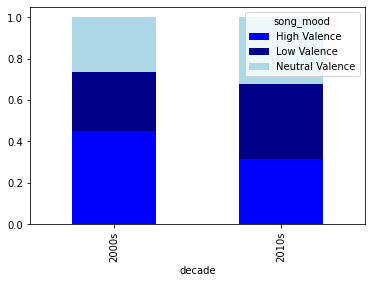

In [23]:
graph1=pd.crosstab(index=data4["decade"],columns=data4.song_mood, normalize="index").plot.bar(color=("blue","darkblue","lightblue"),stacked=True)
graph1

In [24]:
pd.options.display.float_format = '{:.4f}'.format
test1a=pd.crosstab(index=data4['decade'], columns=data4.song_mood, margins=True, normalize='index')
test1a

song_mood,High Valence,Low Valence,Neutral Valence
decade,,,
2000s,0.4508,0.2842,0.2650
2010s,0.3144,0.3607,0.3249
All,0.3793,0.3243,0.2964


### Danceability (danceability_scale)

In [25]:
def danceability_scale(data4):
    if (data4.danceability >= 0.6): return "High Danceability"
    elif(data4.danceability >= 0.4 and data4.danceability < 0.6): return "Medium Danceability"
    elif (data4.danceability < 0.4): return "Low Danceability"

data4['danceability_scale'] = data4.apply(danceability_scale, axis = 1)

/var/folders/k7/hvg8s4m106ddc5td6jdknch80000gn/T/ipykernel_3369/4234441360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['danceability_scale'] = data4.apply(danceability_scale, axis = 1)


<AxesSubplot:xlabel='decade'>

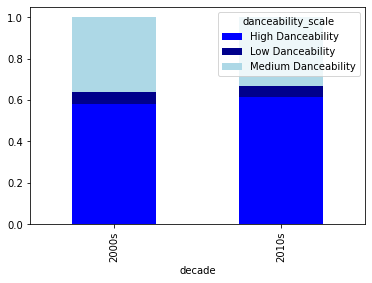

In [26]:
graph2=pd.crosstab(index=data4['decade'],columns=data4.danceability_scale, normalize='index').plot.bar(color=("blue","darkblue","lightblue"),stacked=True)
graph2

### Energy (energy_scale)

In [27]:
def energy_scale(data4):
    if (data4.energy >= 0.6): return "High Energy"
    elif(data4.energy >= 0.4 and data4.energy < 0.6): return "Medium Energy"
    elif (data4.energy < 0.4): return "Low Energy"

data4['energy_scale'] = data4.apply(energy_scale, axis = 1)

/var/folders/k7/hvg8s4m106ddc5td6jdknch80000gn/T/ipykernel_3369/2289495087.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['energy_scale'] = data4.apply(energy_scale, axis = 1)


<AxesSubplot:xlabel='decade'>

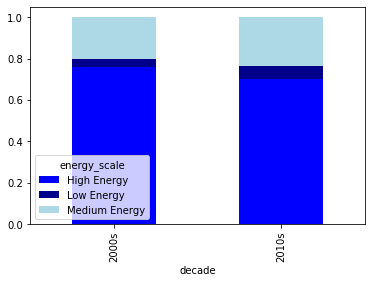

In [28]:
graph3=pd.crosstab(index=data4['decade'],columns=data4.energy_scale, normalize='index').plot.bar(color=("blue","darkblue","lightblue"),stacked=True)
graph3
# I was expecting energy and danceability to align in their data but comparing both graphs, it seems that for high and low energy songs, the results are the same
# suggests that energy and danceability are in fact related

### Loudness (loudness_level) (further discussion required)

In [29]:
data4['loudness'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count   6013.0000
mean      -5.7947
std        2.1246
min      -23.0230
10%       -8.4576
20%       -7.2740
30%       -6.5440
40%       -5.9872
50%       -5.5150
60%       -5.0578
70%       -4.5836
80%       -4.0788
90%       -3.4530
max       -0.7160
Name: loudness, dtype: float64

In [30]:
#def loudness_level(data4):
  #  if (data4.loudness <= -30): return "High Loudness"
  #  elif(data4.loudness > -15 and data4.loudness < -30): return "Medium Loudness"
  #  elif (data4.loudness >=-15): return "Low Loudness"

#data4['loudness_level'] = data4.apply(loudness_level, axis = 1)

In [31]:
def loudness_level(data4):
    if (data4.loudness < -8): return "High Loudness"
    elif(data4.loudness > -8 and data4.loudness < -4): return "Medium Loudness"
    elif (data4.loudness >=-4): return "Low Loudness"

data4['loudness_level'] = data4.apply(loudness_level, axis = 1)

/var/folders/k7/hvg8s4m106ddc5td6jdknch80000gn/T/ipykernel_3369/1544628641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['loudness_level'] = data4.apply(loudness_level, axis = 1)


<AxesSubplot:xlabel='decade'>

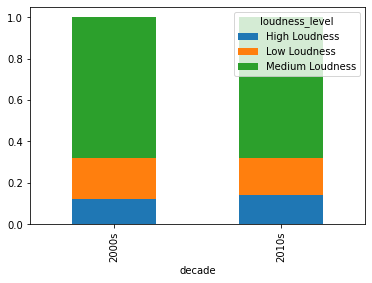

In [32]:
graph4=pd.crosstab(index=data4['decade'],columns=data4.loudness_level, normalize='index').plot.bar(stacked=True)
graph4

In [33]:
pd.options.display.float_format = '{:.4f}'.format
test5=pd.crosstab(index=data4['song_mood'], columns=data4.loudness, margins=True, normalize='index')
test5
#it appears that there aren't any songs medium-high loudness clasified as hits.

loudness,-23.0230,-18.4350,-18.0670,-17.8320,-17.6960,-17.5140,-17.3410,-17.2270,-17.2240,-16.1470,...,-1.1900,-1.1770,-1.1590,-1.1190,-1.0460,-1.0040,-0.9490,-0.8840,-0.8040,-0.7160
song_mood,,,,,,,,,,,,,,,,,,,,,
High Valence,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004,0.0000,0.0000,0.0004
Low Valence,0.0005,0.0005,0.0005,0.0005,0.0005,0.0000,0.0005,0.0005,0.0005,0.0005,...,0.0000,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0005,0.0000
Neutral Valence,0.0000,0.0000,0.0000,0.0000,0.0000,0.0006,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0006,0.0000,0.0006,0.0006,0.0006,0.0000,0.0006,0.0000,0.0000
All,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,...,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002


In [34]:
test6=pd.crosstab(index=data4['valence'], columns=data4.loudness, margins=True, normalize='index')
test6

loudness,-23.0230,-18.4350,-18.0670,-17.8320,-17.6960,-17.5140,-17.3410,-17.2270,-17.2240,-16.1470,...,-1.1900,-1.1770,-1.1590,-1.1190,-1.0460,-1.0040,-0.9490,-0.8840,-0.8040,-0.7160
valence,,,,,,,,,,,,,,,,,,,,,
0.0352,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
0.0376,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
0.0379,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
0.0382,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
0.0388,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.971,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
0.972,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
0.973,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [35]:
data4.valence.describe()

count   6013.0000
mean       0.5225
std        0.2221
min        0.0352
25%        0.3460
50%        0.5240
75%        0.6960
max        0.9760
Name: valence, dtype: float64

### Speechiness (song_words)

In [36]:
def song_words(data4):
    if (data4.speechiness > 0.50): return "High words"
    elif (data4.speechiness < 0.50): return "Low words"
data4["song_words"] = data4.apply(song_words, axis = 1)

#Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

/var/folders/k7/hvg8s4m106ddc5td6jdknch80000gn/T/ipykernel_3369/536760060.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["song_words"] = data4.apply(song_words, axis = 1)


### Tempo (song_speed)

In [37]:
data10sna = data4[data4["decade"]=="2010s"]
data00sna = data4[data4["decade"]=="2000s"]

In [38]:
def song_speed(data4):
    if(data4.tempo >= 40 and data4.tempo < 50): return "Grave-slowest"
    elif(data4.tempo >= 50 and data4.tempo < 55): return "Largo-second"
    elif(data4.tempo >= 55 and data4.tempo < 60): return "Larghetto-third"
    elif(data4.tempo >= 60 and data4.tempo < 70): return "Adagio-fourth"
    elif(data4.tempo >= 70 and data4.tempo < 85): return "Andante-fifth"
    elif(data4.tempo >= 85 and data4.tempo < 100): return "Moderato-sixth"
    elif(data4.tempo >= 100 and data4.tempo < 115): return "Allegretto-seventh"
    elif(data4.tempo <= 115 and data4.tempo < 140): return "Allegro-eight"
    elif (data4.tempo < 140): return "Vivace-fastest"
data4["song_speed"] = data4.apply(song_speed, axis = 1)


/var/folders/k7/hvg8s4m106ddc5td6jdknch80000gn/T/ipykernel_3369/3153495232.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["song_speed"] = data4.apply(song_speed, axis = 1)


## Valence solodolo (mr.rager?)

### Danceability(2000s)

<AxesSubplot:xlabel='danceability', ylabel='Count'>

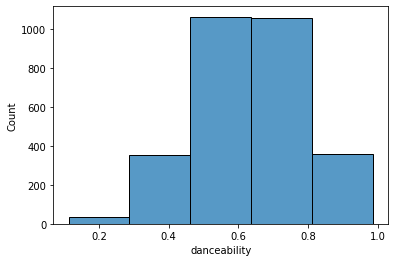

In [39]:
sns.histplot(data=data00sna, x="danceability", bins=5)

### Danceability(2010s)

<AxesSubplot:xlabel='danceability', ylabel='Count'>

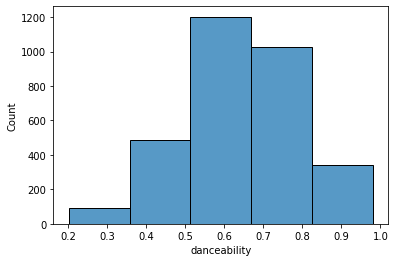

In [40]:
sns.histplot(data=data10sna, x="danceability", bins=5)

### Valence(2000s)

In [41]:
data00sna['valence'].describe()

count   2864.0000
mean       0.5552
std        0.2240
min        0.0388
25%        0.3738
50%        0.5660
75%        0.7320
max        0.9730
Name: valence, dtype: float64

### Valence(2010s)

In [42]:
data10sna['valence'].describe()

count   3149.0000
mean       0.4928
std        0.2162
min        0.0352
25%        0.3240
50%        0.4850
75%        0.6530
max        0.9760
Name: valence, dtype: float64

Currently at the top of this valence only section there is distribution of valence between the two generations.Just visulaizing the data you can see a shift to lower values between the two distritbutions showing an increasing in the lower values and the mid values that represent sadder music overall.Seperating the valence values into ranges for three sets. 

## Lyricsm

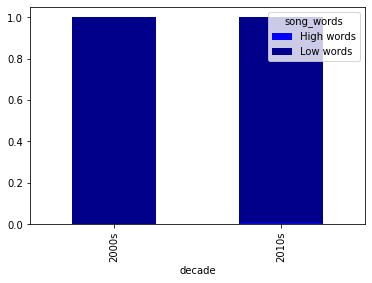

In [43]:
graph5=pd.crosstab(index=data4["decade"],columns=data4.song_words, normalize="index").plot.bar(color=("blue","darkblue","lightblue"),stacked=True)


### Acousticness(2000s)

In [44]:
data00sna['acousticness'].describe()

count   2864.0000
mean       0.1483
std        0.1822
min        0.0000
25%        0.0147
50%        0.0714
75%        0.2260
max        0.9940
Name: acousticness, dtype: float64

### Acousticness(2010s)

In [45]:
data10sna['acousticness'].describe()

count   3149.0000
mean       0.1626
std        0.2064
min        0.0000
25%        0.0205
50%        0.0739
75%        0.2210
max        0.9920
Name: acousticness, dtype: float64

### Correlation (Acousticness and Valence)

In [46]:
data4['acousticness'].corr(data4['valence'])

-0.1595721686646244

In the case of how wordy a song is the column acousticness depicts how much perceantage of the song has spoken word versus music beats and production. Looking the corrolation between valence and the acousticness, you see a negative corrolation so as words decrease and the music becomes more sadder because the valence should decrease. As depicted the acousticness increased between the the two decades which could help explain the dcreasing of valence.

In [47]:
pd.crosstab(index=[data4.decade,data4.song_mood], columns=data4.song_words,normalize='index', margins=True)

song_words              High words  Low words
decade song_mood                             
2000s  High Valence         0.0031     0.9969
       Low Valence          0.0000     1.0000
       Neutral Valence      0.0053     0.9947
2010s  High Valence         0.0040     0.9960
       Low Valence          0.0097     0.9903
       Neutral Valence      0.0039     0.9961
All                         0.0045     0.9955

## Music Speed

### Tempo(2000s)

In [48]:
data00sna['tempo'].describe()

count   2864.0000
mean     120.2652
std       29.5171
min       59.9720
25%       96.0535
50%      118.0910
75%      139.9870
max      210.8570
Name: tempo, dtype: float64

### Tempo(2010s)

In [49]:
data10sna['tempo'].describe()

count   3149.0000
mean     123.5686
std       29.0645
min       48.7180
25%       99.9680
50%      123.8290
75%      142.6890
max      208.0670
Name: tempo, dtype: float64

In [50]:
pd.crosstab(index=[data4.decade,data4.song_mood], columns=data4.song_speed,normalize='index', margins=True)

song_speed              Adagio-fourth  Allegretto-seventh  Allegro-eight  \
decade song_mood                                                           
2000s  High Valence            0.0039              0.2310         0.0000   
       Low Valence             0.0105              0.1731         0.0000   
       Neutral Valence         0.0088              0.1770         0.0000   
2010s  High Valence            0.0070              0.1911         0.0000   
       Low Valence             0.0097              0.1990         0.0012   
       Neutral Valence         0.0071              0.2130         0.0014   
All                            0.0075              0.2011         0.0005   

song_speed              Andante-fifth  Grave-slowest  Larghetto-third  \
decade song_mood                                                        
2000s  High Valence            0.0948         0.0000           0.0020   
       Low Valence             0.1748         0.0000           0.0000   
       Neutral Valence         0.1504         0.0000           0.0000   
2010s  High Valence            0.0962         0.0000           0.0000   
       Low Valence             0.1468         0.0000           0.0000   
       Neutral Valence         0.1128         0.0014           0.0000   
All                            0.1252         0.0002           0.0005   

song_speed              Moderato-sixth  Vivace-fastest  
decade song_mood                                        
2000s  High Valence             0.3228          0.3455  
       Low Valence              0.2010          0.4406  
       Neutral Valence          0.2973          0.3664  
2010s  High Valence             0.2273          0.4784  
       Low Valence              0.2100          0.4333  
       Neutral Valence          0.2638          0.4006  
All                             0.2575          0.4075

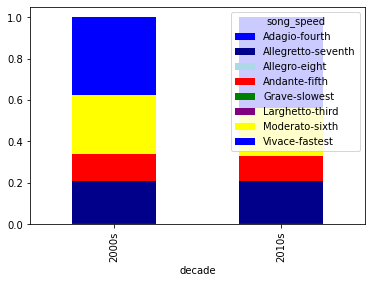

In [51]:
graph6 = pd.crosstab(index=data4["decade"],columns=data4.song_speed, normalize="index").plot.bar(color=("blue","darkblue","lightblue","red","green","purple","yellow"),stacked=True)

I explored the column for music speed, tempo because in my mind i made an assocation with music speed and emotion. There isnt a any big findings based on corrolation or any apartent changes between generations. The average speed did increase for the music between decades. Looking at the change in decades the speed ranges stayed the same for the most part but more songs fell in the fourth fastest speed somewhere in the middle while also increasing the fastest speed overall.  

### Danceability

### Danceability(2000s)

In [52]:
data00sna['danceability'].describe()

count   2864.0000
mean       0.6310
std        0.1487
min        0.1130
25%        0.5278
50%        0.6340
75%        0.7360
max        0.9860
Name: danceability, dtype: float64

### Danceability(2010s)

In [53]:
data10sna['danceability'].describe()

count   3149.0000
mean       0.6418
std        0.1425
min        0.2010
25%        0.5470
50%        0.6450
75%        0.7410
max        0.9810
Name: danceability, dtype: float64

### Correlation (Danceability and Valence)

In [54]:
data4['danceability'].corr(data4['valence'])

0.3479268397272859

In [55]:
pd.crosstab(index=[data4.decade,data4.song_mood], columns=data4.song_speed,normalize='index', margins=True)

song_speed              Adagio-fourth  Allegretto-seventh  Allegro-eight  \
decade song_mood                                                           
2000s  High Valence            0.0039              0.2310         0.0000   
       Low Valence             0.0105              0.1731         0.0000   
       Neutral Valence         0.0088              0.1770         0.0000   
2010s  High Valence            0.0070              0.1911         0.0000   
       Low Valence             0.0097              0.1990         0.0012   
       Neutral Valence         0.0071              0.2130         0.0014   
All                            0.0075              0.2011         0.0005   

song_speed              Andante-fifth  Grave-slowest  Larghetto-third  \
decade song_mood                                                        
2000s  High Valence            0.0948         0.0000           0.0020   
       Low Valence             0.1748         0.0000           0.0000   
       Neutral Valence         0.1504         0.0000           0.0000   
2010s  High Valence            0.0962         0.0000           0.0000   
       Low Valence             0.1468         0.0000           0.0000   
       Neutral Valence         0.1128         0.0014           0.0000   
All                            0.1252         0.0002           0.0005   

song_speed              Moderato-sixth  Vivace-fastest  
decade song_mood                                        
2000s  High Valence             0.3228          0.3455  
       Low Valence              0.2010          0.4406  
       Neutral Valence          0.2973          0.3664  
2010s  High Valence             0.2273          0.4784  
       Low Valence              0.2100          0.4333  
       Neutral Valence          0.2638          0.4006  
All                             0.2575          0.4075

### Loudness

### Loudness(2000s)

In [56]:
data00sna['loudness'].describe()

count   2864.0000
mean      -5.6894
std        2.0372
min      -17.2240
25%       -6.7998
50%       -5.4270
75%       -4.2510
max       -0.8840
Name: loudness, dtype: float64

### Loudness(2010s)

In [57]:
data10sna['loudness'].describe()

count   3149.0000
mean      -5.8904
std        2.1970
min      -23.0230
25%       -6.9810
50%       -5.5890
75%       -4.4010
max       -0.7160
Name: loudness, dtype: float64

### Correlation (Loudness and Valence)

In [58]:
data4['loudness'].corr(data4['valence'])

0.2748417651705158

Loudness and danciability had the largest corrolation to valence when looking at the data overall. In the case of loudness it is a postive corrolation menaing the louder the music the happier it is. This  reafirm a belief that happier music or non-sad music tends not to be louder because loud mjuisc gets people pumped.Its a similair situation for dancability having a corrolation of .34 compared to loudness .27. In the case of dancabilitity while the aveagre increased by .01 the distriubution of dancability skews more values in the lower half for dancability. 

## Analysis  of the Genres Column

### Splitting the Genres Column

In [59]:
#Replacing "0" with "not specified"
data5 = data4a.replace(to_replace ="0",
                 value ="'not specified'")

In [60]:
#Removing extra brackets
data5=data5.copy()
data5['genres']=data5['genres'].str.replace('\[|\]','')
data5

/var/folders/k7/hvg8s4m106ddc5td6jdknch80000gn/T/ipykernel_3369/3484161134.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data5['genres']=data5['genres'].str.replace('\[|\]','')


,track,artist,uri,duration_s,danceability,energy,loudness,mode,speechiness,liveness,tempo,instrumentalness,acousticness,valence,target,decade,genres,genres1
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,188.4930,0.7410,0.6260,-4.8260,0,0.0886,0.0828,108.0290,0.0000,0.0200,0.7060,1,2010s,"'alt z', 'canadian contemporary r&b', 'canadia...",1
1,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,176.8800,0.5500,0.4150,-6.5570,0,0.0520,0.1080,172.0650,0.0000,0.1610,0.2740,1,2010s,"'danish pop', 'pop', 'scandipop'",1
2,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,205.4630,0.8070,0.8870,-3.8920,1,0.2750,0.3910,160.5170,0.0000,0.0038,0.7800,1,2010s,'not specified',0
3,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,193.0430,0.4820,0.8730,-3.1450,1,0.0853,0.4090,165.0840,0.0000,0.0111,0.7370,1,2010s,"'canadian pop', 'candy pop', 'dance pop', 'pop...",1
4,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,144.2440,0.7360,0.5220,-8.0200,1,0.1160,0.1080,97.5470,0.0000,0.0299,0.3690,1,2010s,"'atl hip hop', 'dance pop', 'dirty south rap',...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6573,The Anthem,Good Charlotte,spotify:track:0BRHnOFm6sjxN1i9LJrUDu,231.6800,0.4940,0.9390,-3.1270,1,0.1260,0.1390,177.7510,0.0000,0.0067,0.8930,1,2000s,"'alternative metal', 'pop punk'",1
6574,I Can,Nas,spotify:track:2NPxL1QqPrD1a7OLHjVcAP,234.5600,0.8370,0.8850,-3.9140,0,0.1820,0.0666,95.3130,0.0000,0.1030,0.6940,1,2000s,"'conscious hip hop', 'east coast hip hop', 'ga...",1
6576,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,208.7740,0.6670,0.6270,-10.4880,0,0.0654,0.1110,186.0810,0.0001,0.0972,0.7840,1,2000s,"'hip pop', 'neo soul', 'new jack swing', 'quie...",1
6577,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,208.7740,0.6910,0.3890,-10.1250,1,0.0653,0.0981,122.2190,0.0000,0.2550,0.4370,1,2000s,"'dance pop', 'hip pop', 'pop', 'post-teen pop'...",1


In [61]:
#Splitting listed genres for each track into individual columns
genres = data5["genres"].str.split(",", expand = True)
genres

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,'alt z','canadian contemporary r&b','canadian pop','dance pop','electropop','pop','post-teen pop','r&b',None,None,None,None,None,None,None
1,'danish pop','pop','scandipop',None,None,None,None,None,None,None,None,None,None,None,None
2,'not specified',None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,'canadian pop','candy pop','dance pop','pop','post-teen pop',None,None,None,None,None,None,None,None,None,None
4,'atl hip hop','dance pop','dirty south rap','hip hop','pop rap','rap','southern hip hop','trap',None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6573,'alternative metal','pop punk',None,None,None,None,None,None,None,None,None,None,None,None,None
6574,'conscious hip hop','east coast hip hop','gangster rap','hardcore hip hop','hip hop','queens hip hop','rap',None,None,None,None,None,None,None,None
6576,'hip pop','neo soul','new jack swing','quiet storm','r&b','urban contemporary',None,None,None,None,None,None,None,None,None
6577,'dance pop','hip pop','pop','post-teen pop','r&b','urban contemporary',None,None,None,None,None,None,None,None,None


In [62]:
#Combining the split genres dataframe with our previous dataframe
data6=pd.concat([data5, genres], ignore_index=False, axis=1)
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6013 entries, 0 to 6578
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6013 non-null   object 
 1   artist            6013 non-null   object 
 2   uri               6013 non-null   object 
 3   duration_s        6013 non-null   float64
 4   danceability      6013 non-null   float64
 5   energy            6013 non-null   float64
 6   loudness          6013 non-null   float64
 7   mode              6013 non-null   int64  
 8   speechiness       6013 non-null   float64
 9   liveness          6013 non-null   float64
 10  tempo             6013 non-null   float64
 11  instrumentalness  6013 non-null   float64
 12  acousticness      6013 non-null   float64
 13  valence           6013 non-null   float64
 14  target            6013 non-null   int64  
 15  decade            6013 non-null   object 
 16  genres            6013 non-null   object 


### Dropping all but, the first column with genre types

In [63]:
data99 = data6.drop(['genres1'], axis = 1)
data99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6013 entries, 0 to 6578
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6013 non-null   object 
 1   artist            6013 non-null   object 
 2   uri               6013 non-null   object 
 3   duration_s        6013 non-null   float64
 4   danceability      6013 non-null   float64
 5   energy            6013 non-null   float64
 6   loudness          6013 non-null   float64
 7   mode              6013 non-null   int64  
 8   speechiness       6013 non-null   float64
 9   liveness          6013 non-null   float64
 10  tempo             6013 non-null   float64
 11  instrumentalness  6013 non-null   float64
 12  acousticness      6013 non-null   float64
 13  valence           6013 non-null   float64
 14  target            6013 non-null   int64  
 15  decade            6013 non-null   object 
 16  genres            6013 non-null   object 


In [64]:
data99.head(10).transpose()

,0,1,2,3,4,5,6,7,8,11
track,Wild Things,Love Someone,Juju On That Beat (TZ Anthem),Here's To Never Growing Up,Helluva Night,My Last,Break Up In The End,Crawling Back To You,Hotline Bling,Cut Her Off
artist,Alessia Cara,Lukas Graham,Zay Hilfigerrr & Zayion McCall,Avril Lavigne,Ludacris,Big Sean Featuring Chris Brown,Cole Swindell,Daughtry,Drake,KCamp Featuring 2 Chainz
uri,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,spotify:track:1lItf5ZXJc1by9SbPeljFd,spotify:track:0qwcGscxUHGZTgq0zcaqk1,spotify:track:0flKDWZq11997Fb2ptkQvu,spotify:track:70tFuqBcduJv15bEnOPRTh,spotify:track:5Z19ylxppfnfdP4JH0u8oj,spotify:track:6BDtTzjbJ5kKKSWcJT8MlX,spotify:track:0wwPcA6wtMf6HUMpIRdeP7,spotify:track:2Vevs2eAQNNb7NTpKj5kqA
duration_s,188.4930,176.8800,205.4630,193.0430,144.2440,214.3200,262.4930,200.3870,252.7870,352.2470
danceability,0.7410,0.5500,0.8070,0.4820,0.7360,0.3870,0.5070,0.4380,0.8910,0.7690
energy,0.6260,0.4150,0.8870,0.8730,0.5220,0.7730,0.3720,0.9190,0.6250,0.6110
loudness,-4.8260,-6.5570,-3.8920,-3.1450,-8.0200,-5.6850,-8.4330,-2.9100,-7.8610,-2.8500
mode,0,0,1,1,1,1,1,0,1,1
speechiness,0.0886,0.0520,0.2750,0.0853,0.1160,0.1700,0.0303,0.0495,0.0558,0.0390
liveness,0.0828,0.1080,0.3910,0.4090,0.1080,0.2090,0.2710,0.1580,0.0504,0.2210


In [65]:
data999 = data99.drop(data99.iloc[:, 17:31], axis = 1)
data999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6013 entries, 0 to 6578
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6013 non-null   object 
 1   artist            6013 non-null   object 
 2   uri               6013 non-null   object 
 3   duration_s        6013 non-null   float64
 4   danceability      6013 non-null   float64
 5   energy            6013 non-null   float64
 6   loudness          6013 non-null   float64
 7   mode              6013 non-null   int64  
 8   speechiness       6013 non-null   float64
 9   liveness          6013 non-null   float64
 10  tempo             6013 non-null   float64
 11  instrumentalness  6013 non-null   float64
 12  acousticness      6013 non-null   float64
 13  valence           6013 non-null   float64
 14  target            6013 non-null   int64  
 15  decade            6013 non-null   object 
 16  genres            6013 non-null   object 


In [66]:
data9999 = data999.rename(columns={0:'main_genre'})
data9999.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6013 entries, 0 to 6578
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6013 non-null   object 
 1   artist            6013 non-null   object 
 2   uri               6013 non-null   object 
 3   duration_s        6013 non-null   float64
 4   danceability      6013 non-null   float64
 5   energy            6013 non-null   float64
 6   loudness          6013 non-null   float64
 7   mode              6013 non-null   int64  
 8   speechiness       6013 non-null   float64
 9   liveness          6013 non-null   float64
 10  tempo             6013 non-null   float64
 11  instrumentalness  6013 non-null   float64
 12  acousticness      6013 non-null   float64
 13  valence           6013 non-null   float64
 14  target            6013 non-null   int64  
 15  decade            6013 non-null   object 
 16  genres            6013 non-null   object 


### Dummy Variables

In [67]:
def main_genre1(data9999):
    if (data9999['main_genre'].__contains__('pop')): return "pop"
    elif (data9999['main_genre'].__contains__('rock')): return "rock"
    elif (data9999['main_genre'].__contains__('country')): return "country"
    elif (data9999['main_genre'].__contains__('hip hop')): return "hip hop"
    elif (data9999['main_genre'].__contains__('metal')): return "metal"
    elif (data9999['main_genre']): return "other"
data9999["main_genre1"] = data9999.apply(main_genre1, axis = 1)
data9999

KeyError: 'main_genre'

In [ ]:
dummies=pd.get_dummies(data9999.main_genre1)
dummies

In [ ]:
merged = pd.concat([data9999,dummies], axis = 1)
merged.head(50)

In [ ]:
graph99 = pd.crosstab(index=merged["decade"],columns=merged.main_genre1, normalize="index").plot.bar(color=("beige","lightgreen","lavender","lightblue","pink","plum"),stacked=True)

In [ ]:
graph999 = pd.crosstab(index=merged["main_genre1"],columns=merged["decade"], normalize="index").plot.bar(color=('teal','cyan'),stacked=False)

In [ ]:
pd.crosstab(index=[merged.decade], columns=merged.main_genre1,normalize='index', margins=True)

### Getting a count of the most popular genres per decade (uncertain)

In [ ]:
#genres split by decade
genres10s = data99[data99['decade']=="2010s"]
genres00s = data99[data99['decade']=="2000s"]

In [ ]:
genres10s.info()

In [ ]:
#Creating a dataframe with the counts and sum of genres for the 2010s and sorting it by most highest sum in column 'Total'
g10s = genres10s.groupby([0]).count()
g10s['Total'] = g10s.iloc[:, 16:30].sum(axis=1)
g10s = g10s.sort_values(['Total'],ascending=False)
g10s.transpose()

In [ ]:
#Creating a dataframe with the counts and sum of genres for the 2000s and sorting it by most highest sum in column 'Total'
g00s = genres00s.groupby([0]).count()
g00s['Total'] = g00s.iloc[:, 16:30].sum(axis=1)
g00s = g00s.sort_values(['Total'],ascending=False)
g00s.transpose()

In [ ]:
#looking at the top 5 most frequent genre tags in the 2000s
g00s.head(5) 

In [ ]:
#looking at the top 5 most frequent genre tags in the 2010s
g10s.head(10)

In [ ]:
ge10s = g10s.iloc[0:5,:]
ge10s